# **Flipkart Laptop Price Prediction**

-  - **Data Analysis and Mining**


### **PROBLEM STATEMENT**

Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.
He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things.

Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS etc) and its selling price. But he is not so good at Data Mining.
To solve this problem he already asked his Data Engineering team to collect laptop data from various competitors.

Now he needs your (i.e Data Scientist’s) help to solve the following problem.

**Sprint- 1 (Data Analysis and Mining)**

Musk’s Requirements
* Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.
* Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.

**Sprint - 2 (ML Model Tuning)**

Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.
* First try to check if the models you have created are a best fit or not.
* See if applying cross validation helps improve your models performance.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/laptop_details.csv")

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [ ]:
df.shape

(720, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


**PREPROCESSING OF DATASET**

In [ ]:
# Processor Information
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor']=df['Processor'].apply(lambda x : ''.join(x))
df['Processor']=df['Processor'].apply(lambda x: x.replace(" Processor", ""))

In [ ]:
df.iloc[6,4]='Intel Core i3'
df.iloc[8,4]='Intel Core i3'
df.iloc[29,4]='Intel Core i3'
df.iloc[33,4]='AMD Ryzen 5 Hexa Core'
df.iloc[53,4]='Intel Core i5'
df.iloc[54,4]='Intel Core i5'
df.iloc[69,4]='AMD Ryzen R5-5600H'
df.iloc[83,4]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,4]='Intel PQC-N5030'
df.iloc[116,4]='Gen Intel Evo Core i5'
df.iloc[122,4]='AMD Ryzen 7 Octa Core'
df.iloc[142,4]='AMD Ryzen 3 Dual Core'
df.iloc[172,4]='Intel Core i3'
df.iloc[232,4]='Intel Core i7'
df.iloc[249,4]='Intel Core i3'
df.iloc[253,4]='AMD Ryzen 5-3450U'
df.iloc[259,4]='Intel Core i5'
df.iloc[349,4]='Intel Core i5'
df.iloc[355,4]='Intel Core i3'
df.iloc[393,4]='Intel Core i5'
df.iloc[438,4]='Intel Core i5'
df.iloc[443,4]='Intel Core i7'
df.iloc[502,4]='AMD Ryzen 5 Hexa Core'
df.iloc[508,4]='Intel Core i5'
df.iloc[593,4]='Intel Core i7'
df.iloc[622,4]='Intel Core i7'
df.iloc[628,4]='Intel Core i9'
df.iloc[643,4]='Intel Core i7'
df.iloc[644,4]='Intel Core i5'
df.iloc[645,4]='AMD Ryzen 5 Hexa Core'
df.iloc[688,4]='Intel Core i7'
df.iloc[689,4]='Intel Core i7'

In [ ]:
df[df['Processor']=='Gen Intel Evo Core i5'] = 'Intel Core i5'
df[df['Processor']=='AMD Dual Core'] = 'AMD Ryzen 5 Dual Core' 

In [ ]:

df.Processor.value_counts()

Intel Core i5                   159
Intel Core i3                   135
AMD Ryzen 9 Octa Core            87
AMD Ryzen 7 Octa Core            80
Intel Core i7                    56
AMD Ryzen 5 Hexa Core            51
AMD Ryzen 3 Dual Core            43
AMD Ryzen 5 Quad Core            37
Intel Celeron Dual Core          20
Intel Core i9                    11
Apple M1                          7
Apple M1 Pro                      6
Apple M2                          5
AMD Ryzen 3 Quad Core             4
Intel Celeron Quad Core           3
Intel Pentium Quad Core           3
AMD Ryzen 5 Dual Core             2
AMD Athlon Dual Core              2
Intel Pentium Silver              2
AMD Ryzen 5-3450U                 1
AMD Ryzen R5-5600H                1
Apple M1 Max                      1
Intel PQC-N5030                   1
Qualcomm Snapdragon 7c Gen 2      1
AMD Ryzen 7 Quad Core             1
AMD Ryzen 3 Hexa Core             1
Name: Processor, dtype: int64

In [ ]:
df.Processor.unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Quad Core',
       'AMD Ryzen 9 Octa Core', 'AMD Ryzen 7 Octa Core', 'Apple M1',
       'Intel Celeron Dual Core', 'AMD Ryzen 3 Dual Core',
       'AMD Athlon Dual Core', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'AMD Ryzen R5-5600H', 'Intel Celeron Quad Core', 'Intel Core i7',
       'Apple M1 Pro', 'Qualcomm Snapdragon 7c Gen 2', 'Intel PQC-N5030',
       'Apple M1 Max', 'Intel Core i9', 'Intel Pentium Silver',
       'AMD Ryzen 5-3450U', 'AMD Ryzen 5 Dual Core',
       'Intel Pentium Quad Core', 'AMD Ryzen 3 Hexa Core'], dtype=object)

In [ ]:
# Brand

regex = r'^\w+'
df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.Brand[df.Brand == 'acer'] = 'Acer'
df.Brand[df.Brand == 'realme'] = 'Realme'  
df.Brand.value_counts()

ASUS         251
Lenovo       195
HP            61
DELL          61
Acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Realme         5
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Intel          1
Vaio           1
GIGABYTE       1
Nokia          1
AMD            1
Name: Brand, dtype: int64

In [ ]:
# OperatingSystem

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

df['Operating System'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System'] = df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System'][df['Operating System']== ''] = '64 bit MAC   Operating System'
split_os = df['Operating System'].str.split(' ', 6, expand=True)
df['Operating System'] = split_os[2]+" "+split_os[3]
df['Operating System'].replace({'DOS Operating':'DOS','Chrome Operating':'Chrome'}, inplace=True)


df['Operating System'].value_counts()

Windows 11    405
MAC           197
Windows 10    115
DOS             2
Chrome          1
Name: Operating System, dtype: int64

In [ ]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

# RAM type & RAM size
split_ram = df['RAM'].str.split(' ', 3, expand=True)
df['RAM Type'] = split_ram[2]+" "+split_ram[3]
df['RAM Size'] = split_ram[0]+" "+split_ram[1]
df['RAM Type'] = df['RAM Type'].str.replace(" RAM", "")
df = df.drop(columns = ['RAM'],axis=1)

df.loc[df['RAM Type'] == 'SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and8 GB DDR4']
df = df.drop(index= 438,axis =0)
df["RAM Size"] = df["RAM Size"].astype("object")
print(df['RAM Type'].value_counts())
print("-"*50)
print(df['RAM Size'].value_counts())

DDR4              558
DDR5               92
LPDDR4X            37
Unified Memory     12
LPDDR5              9
LPDDR4              8
LPDDR3              1
Name: RAM Type, dtype: int64
--------------------------------------------------
8 GB     401
16 GB    263
4 GB      36
32 GB     17
Name: RAM Size, dtype: int64


In [ ]:
# Storage
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [ ]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Processor,Brand,Operating System,RAM Type,RAM Size,Storage
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,"₹32,990",Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,Qualcomm Snapdragon 7c Gen 2,SAMSUNG,MAC,LPDDR4X,4 GB,
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core,Lenovo,MAC,DDR4,4 GB,
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,"₹19,490",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core,Lenovo,MAC,DDR4,4 GB,
116,Intel Core i5,Intel Core i5,Intel Core i5,Intel Core i5,Intel Core i5,Intel,MAC,NaN,NaN,
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹14,990",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,ASUS,MAC,LPDDR4,4 GB,
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹24,390",Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core,ASUS,MAC,LPDDR4,4 GB,
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,"₹21,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core,ASUS,Windows 11,DDR4,4 GB,
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,"₹19,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Intel Celeron Dual Core,ASUS,Windows 11,DDR4,4 GB,
575,AMD Ryzen 5 Dual Core,AMD Ryzen 5 Dual Core,AMD Ryzen 5 Dual Core,AMD Ryzen 5 Dual Core,AMD Ryzen 5 Dual Core,AMD,MAC,NaN,NaN,
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,"₹28,490",Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Intel Celeron Dual Core,Lenovo,Chrome,LPDDR4X,4 GB,


In [ ]:
df = df.drop(index=[116,575],axis =0)

In [ ]:
df.iloc[83,9]='128 GB,EMMC'
df.iloc[89,9]='64 GB,EMMC'
df.iloc[96,9]='64 GB,EMMC'
df.iloc[345,9]='32 GB,EMMC'
df.iloc[509,9]='64 GB,EMMC'
df.iloc[544,9]='64 GB,EMMC'
df.iloc[559,9]='64 GB,EMMC'
df.iloc[632,9]='128 GB,EMMC'
df.iloc[695,9]='64 GB,EMMC'
df.iloc[715,9]='64 GB,EMMC'

In [ ]:
df['Storage'][df['Storage'] == ''] = '0 GB HDD 0 GB SSD'

In [ ]:
df['Storage'].replace({'256 GB SSD':'256 GB,SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512 GB,SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1 TB,SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1 TB,HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128 GB,SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2 TB,SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1 TB,HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256 GB,HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1 TB,HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1 TB,HDD'}, inplace=True)
df['Storage'].replace({'0 GB HDD 0 GB SSD':'512 GB,SSD'}, inplace=True)

In [ ]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(',', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Processor,Brand,Operating System,RAM Type,RAM Size,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,Lenovo,Windows 11,DDR4,8 GB,256 GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3,Lenovo,Windows 11,DDR4,8 GB,512 GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3,ASUS,Windows 11,DDR4,8 GB,512 GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core,HP,Windows 10,DDR4,8 GB,512 GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5,ASUS,MAC,DDR4,8 GB,512 GB,SSD


In [ ]:
print(df["Disc Type"].value_counts())


SSD     661
HDD      46
EMMC     10
Name: Disc Type, dtype: int64


In [ ]:
print(df["Disc Size"].value_counts())

512 GB    378
1 TB      219
256 GB     97
128 GB      8
64 GB       7
2 TB        7
32 GB       1
Name: Disc Size, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           717 non-null    object
 1   Rating            578 non-null    object
 2   MRP               717 non-null    object
 3   Feature           717 non-null    object
 4   Processor         717 non-null    object
 5   Brand             717 non-null    object
 6   Operating System  717 non-null    object
 7   RAM Type          717 non-null    object
 8   RAM Size          717 non-null    object
 9   Disc Size         717 non-null    object
 10  Disc Type         717 non-null    object
dtypes: object(11)
memory usage: 67.2+ KB


In [ ]:
# Price
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype('int')
df.rename(columns = {'MRP':'Price'}, inplace = True)

In [ ]:
# Rating
df['Rating'] = df['Rating'].fillna(df['Rating'].median())


In [ ]:
df=df.drop(columns = ['Feature'],axis=1)

In [ ]:
df=df[['Brand','Operating System','Processor','RAM Type', 'RAM Size','Disc Type','Disc Size','Rating','Price']]
df.head()

,Brand,Operating System,Processor,RAM Type,RAM Size,Disc Type,Disc Size,Rating,Price
0,Lenovo,Windows 11,Intel Core i3,DDR4,8 GB,SSD,256 GB,4.2,36990
1,Lenovo,Windows 11,Intel Core i3,DDR4,8 GB,SSD,512 GB,4.2,39990
2,ASUS,Windows 11,Intel Core i3,DDR4,8 GB,SSD,512 GB,4.3,32990
3,HP,Windows 10,AMD Ryzen 5 Hexa Core,DDR4,8 GB,SSD,512 GB,4.4,49990
4,ASUS,MAC,Intel Core i5,DDR4,8 GB,SSD,512 GB,4.4,49990


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 719
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             717 non-null    object 
 1   Operating System  717 non-null    object 
 2   Processor         717 non-null    object 
 3   RAM Type          717 non-null    object 
 4   RAM Size          717 non-null    object 
 5   Disc Type         717 non-null    object 
 6   Disc Size         717 non-null    object 
 7   Rating            717 non-null    float64
 8   Price             717 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 56.0+ KB


# **EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [ ]:
df.columns

Index(['Brand', 'Operating System', 'Processor', 'RAM Type', 'RAM Size',
       'Disc Type', 'Disc Size', 'Rating', 'Price'],
      dtype='object')

In [ ]:
cols=['Brand','Processor','Operating System','RAM Size','RAM Type','Disc Size','Disc Type']

for col in cols:
    print(" {} ".format(col))
    print("-"*20)
    print("Unique values : \n{}".format(df[col].unique()))
    print()
    print("Value counts : \n{}".format(df[col].value_counts()))
    print('_'*80)
    

 Brand 
--------------------
Unique values : 
['Lenovo' 'ASUS' 'HP' 'DELL' 'RedmiBook' 'Realme' 'Acer' 'MSI' 'APPLE'
 'Infinix' 'SAMSUNG' 'Ultimus' 'Vaio' 'GIGABYTE' 'Nokia' 'ALIENWARE']

Value counts : 
ASUS         251
Lenovo       195
HP            61
DELL          61
Acer          34
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Realme         5
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand, dtype: int64
________________________________________________________________________________
 Processor 
--------------------
Unique values : 
['Intel Core i3' 'AMD Ryzen 5 Hexa Core' 'Intel Core i5'
 'AMD Ryzen 7 Quad Core' 'AMD Ryzen 5 Quad Core' 'AMD Ryzen 9 Octa Core'
 'AMD Ryzen 7 Octa Core' 'Apple M1' 'Intel Celeron Dual Core'
 'AMD Ryzen 3 Dual Core' 'AMD Athlon Dual Core' 'AMD Ryzen 3 Quad Core'
 'Apple M2' 'AMD Ryzen R5-5600H' 'Intel Celeron Quad Core' 'Intel Core i7'
 'Apple M1 Pro' 'Qualcomm Sn

<Axes: title={'center': 'Countplot for Laptop Brands'}, ylabel='Brand Name'>

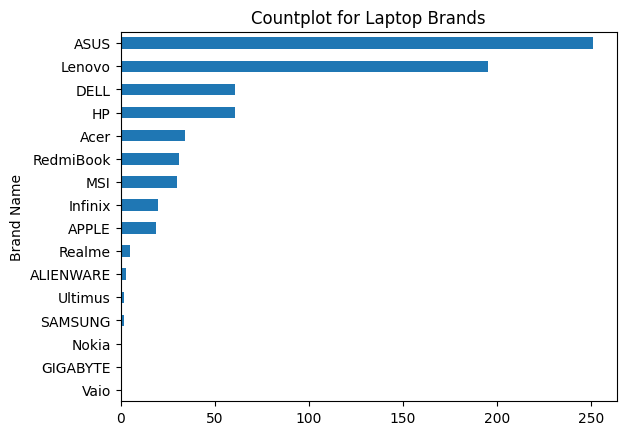

In [ ]:
df["Brand"].value_counts().sort_values(ascending=True).plot(kind="barh",title = "Countplot for Laptop Brands",xlabel="Brand Name",ylabel="Count")

<Axes: title={'center': 'Countplot for Operating System'}, xlabel='Operating System', ylabel='Count'>

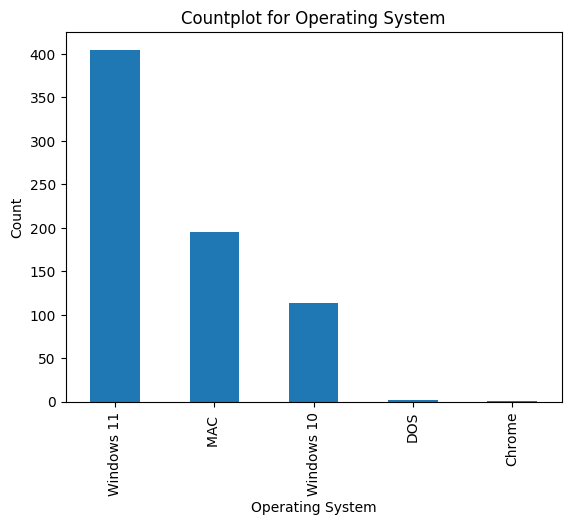

In [ ]:
df['Operating System'].value_counts().plot(kind="bar",title = "Countplot for Operating System",xlabel="Operating System",ylabel="Count")

<Axes: title={'center': 'Countplot for Type of RAM'}, ylabel='Type of RAM'>

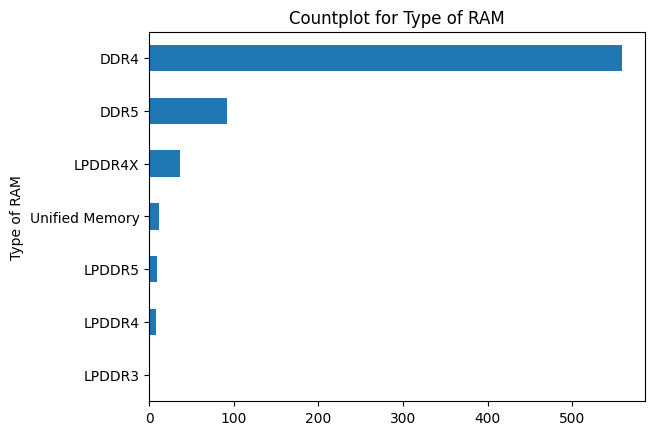

In [ ]:
df['RAM Type'].value_counts().sort_values(ascending=True).plot(kind="barh",title = "Countplot for Type of RAM",xlabel="Type of RAM",ylabel="Count")

<Axes: title={'center': 'Countplot for RAM Size'}, xlabel='RAM Size', ylabel='Count'>

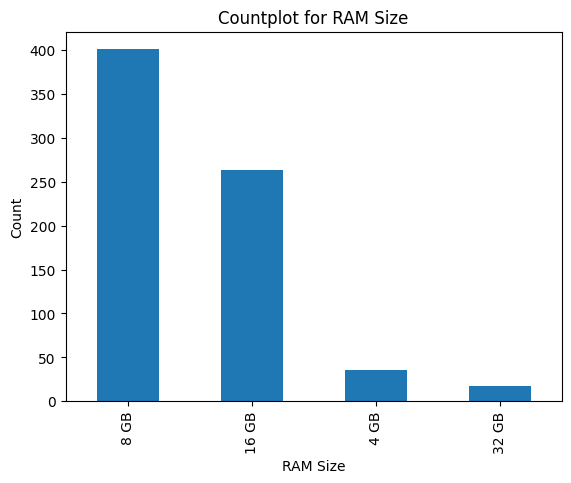

In [ ]:
df["RAM Size"].value_counts().plot(kind="bar",title = "Countplot for RAM Size",xlabel="RAM Size",ylabel="Count")

**TARGET COLUMN - PRICE**

In [ ]:
df.Price.describe().round(2)

count       717.00
mean      81643.97
std       61616.77
min       14990.00
25%       38999.00
50%       59990.00
75%       94990.00
max      434830.00
Name: Price, dtype: float64

Difference between Mean and median is high, which indicates the presence of Outliers in the Price column.

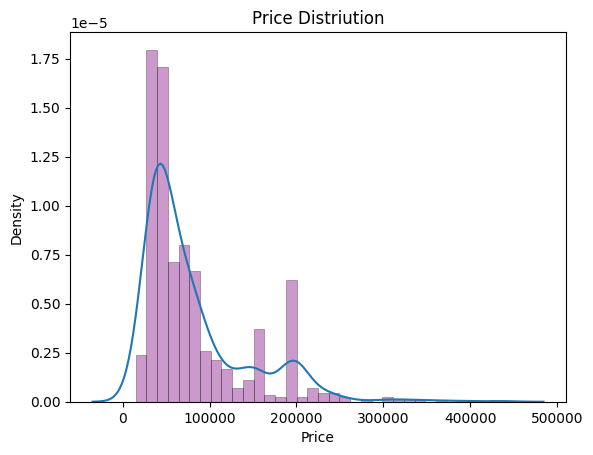

In [ ]:
sns.distplot(df['Price'],
             hist_kws={'color':'purple', 'edgecolor':'black',
                       'linewidth':.5, 'linestyle':'-'})
sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Price Distriution")
plt.show()

Most Laptop price is in range upto 1 Lakh.There are some laptop prices which are far away from group of data, Each data point is important so we will take transformation of this column.

<Axes: >

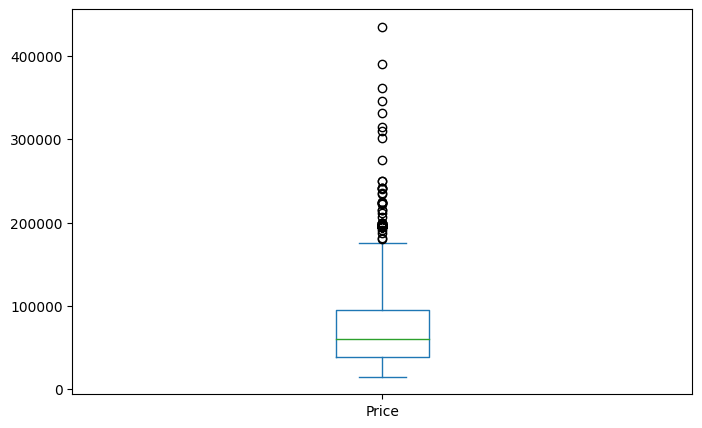

In [ ]:
df['Price'].plot(kind='box', figsize=(8,5))

**BIVARIATE ANALYSIS WITH TARGET VARIABLE (PRICE)**

            Price                  
              min     max      mean
Brand                              
ALIENWARE  199990  345390  253390.0
APPLE       88990  309490  162332.0
ASUS        14990  361990  115668.0
Acer        24990  155490   62383.0
DELL        30428  434830   73661.0
GIGABYTE    73990   73990   73990.0
HP          25990  199990   65196.0
Infinix     20990   52990   36890.0
Lenovo      19490  157990   45547.0
MSI         43990  389990  121964.0
Nokia       50490   50490   50490.0
Realme      46990   64999   53192.0
RedmiBook   31990   39990   39732.0
SAMSUNG     32990   59990   46490.0
Ultimus     15990   19990   17990.0
Vaio        40990   40990   40990.0


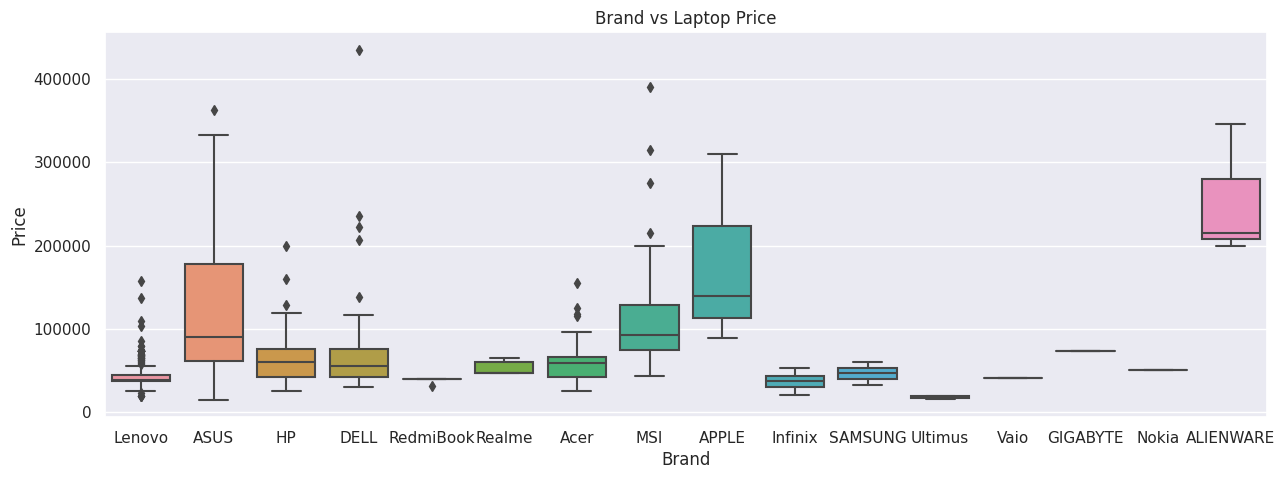

In [ ]:
print(df.groupby(['Brand']).agg({'Price' : ['min', 'max', 'mean']}).round())
plt.figure(figsize=(15, 5))
sns.boxplot(x='Brand', y ='Price', data=df);
plt.title('Brand vs Laptop Price')
plt.show()

                  Price                  
                    min     max      mean
Operating System                         
Chrome            28490   28490   28490.0
DOS               35990   69990   52990.0
MAC               14990  309490  106597.0
Windows 10        25950  345390   75561.0
Windows 11        19990  434830   71614.0


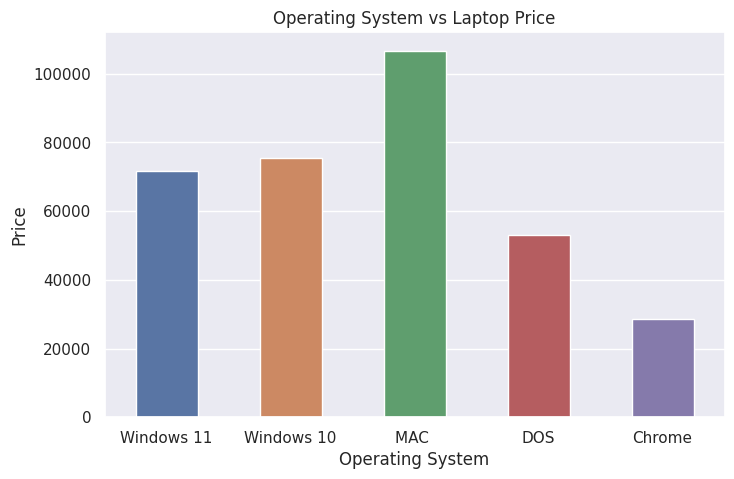

In [ ]:
print(df.groupby(['Operating System']).agg({'Price' : ['min', 'max', 'mean']}).round())
plt.figure(figsize=(8,5))
sns.barplot(x=df['Operating System'],y=df['Price'],ci = 0,width=0.5)
plt.title('Operating System vs Laptop Price')
plt.show()

                               Price                  
                                 min     max      mean
Processor                                             
AMD Athlon Dual Core           25990   29390   27690.0
AMD Ryzen 3 Dual Core          24990   42190   35400.0
AMD Ryzen 3 Hexa Core          64590   64590   64590.0
AMD Ryzen 3 Quad Core          37499   43667   40691.0
AMD Ryzen 5 Dual Core          56990   56990   56990.0
AMD Ryzen 5 Hexa Core          43990   99990   58462.0
AMD Ryzen 5 Quad Core          35990   52575   39740.0
AMD Ryzen 5-3450U              48184   48184   48184.0
AMD Ryzen 7 Octa Core          55600  249990   97725.0
AMD Ryzen 7 Quad Core          44990   44990   44990.0
AMD Ryzen 9 Octa Core          94990  361990  179640.0
AMD Ryzen R5-5600H             70990   70990   70990.0
Apple M1                       88990  149990  108276.0
Apple M1 Max                  309490  309490  309490.0
Apple M1 Pro                  181990  241990  222490.0
Apple M2  

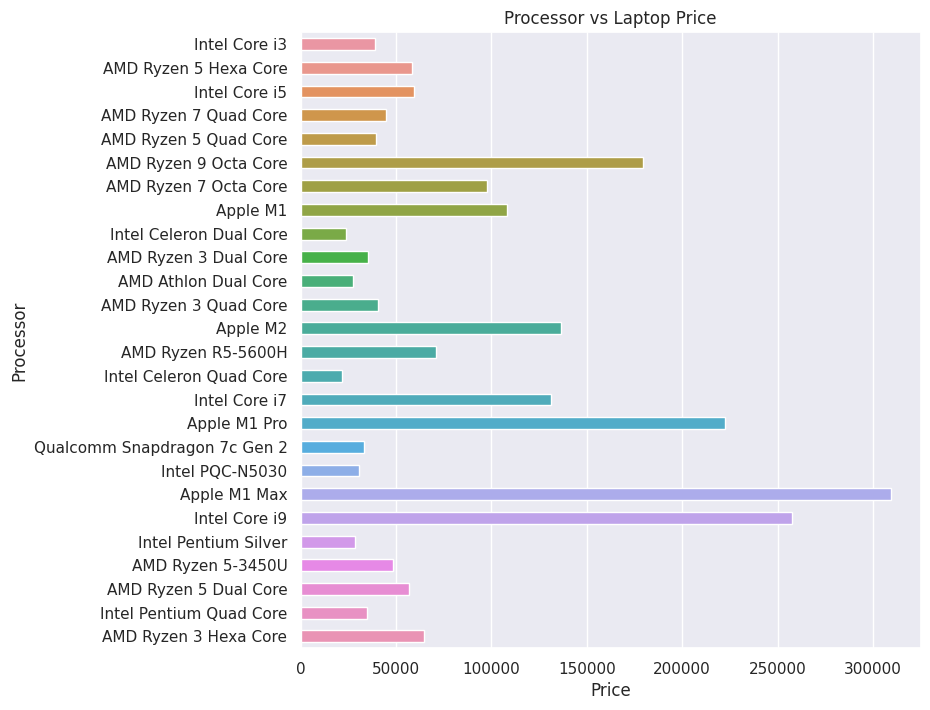

In [ ]:
print(df.groupby(['Processor']).agg({'Price' : ['min', 'max', 'mean']}).round())
plt.figure(figsize=(8,8))
sns.barplot(y=df['Processor'],x=df['Price'],ci = 0,width=0.5,orient='h')
plt.title('Processor vs Laptop Price')
plt.show()

                 Price                  
                   min     max      mean
RAM Type                                
DDR4             19490  434830   62990.0
DDR5             76590  389990  188290.0
LPDDR3          233990  233990  233990.0
LPDDR4           14990   71990   27040.0
LPDDR4X          20990  224990   58328.0
LPDDR5           89990  174990  125879.0
Unified Memory  121990  309490  193865.0


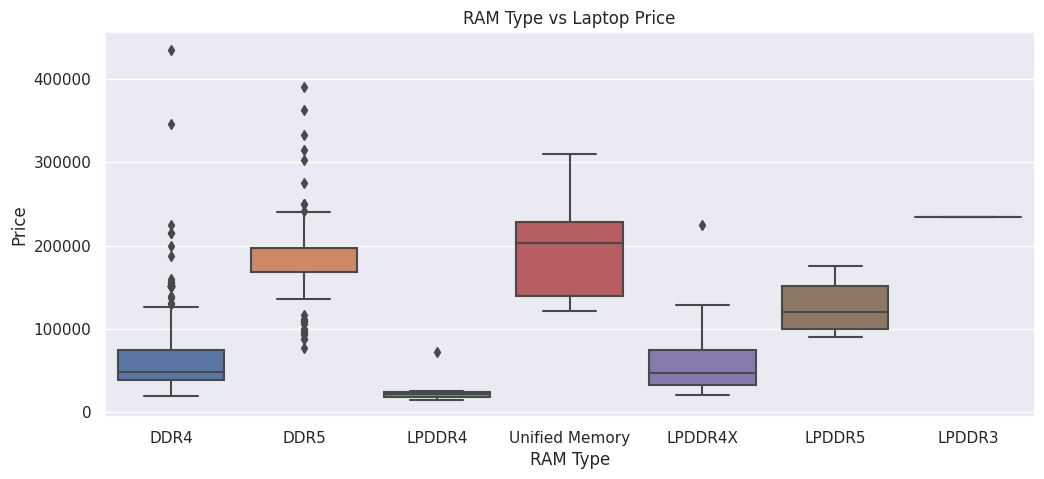

In [ ]:
print(df.groupby(['RAM Type']).agg({'Price' : ['min', 'max', 'mean']}).round())
plt.figure(figsize=(12,5))
sns.boxplot(x=df['RAM Type'],y=df['Price'])
plt.title('RAM Type vs Laptop Price')
plt.show()

           Price                  
             min     max      mean
RAM Size                          
16 GB      37990  241990  125826.0
32 GB     199990  434830  288975.0
4 GB       14990   61249   29502.0
8 GB       22990  149990   48558.0


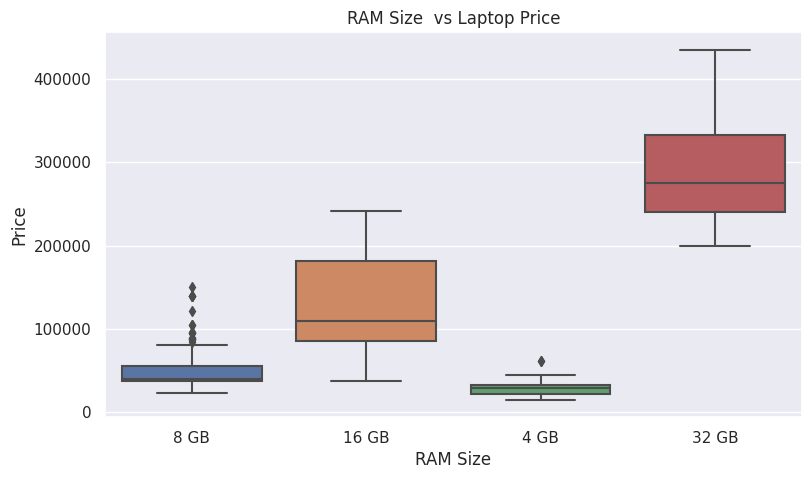

In [ ]:
print(df.groupby(['RAM Size']).agg({'Price' : ['min', 'max', 'mean']}).round())
plt.figure(figsize=(9,5))
sns.boxplot(x=df['RAM Size'],y=df['Price'])
plt.title( 'RAM Size  vs Laptop Price')
plt.show()

           Price                 
             min     max     mean
Disc Type                        
EMMC       19490  196990  67424.0
HDD        19490  117990  57415.0
SSD        14990  434830  83545.0


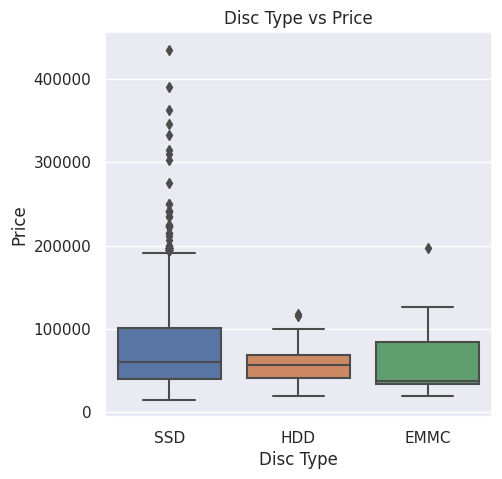

In [ ]:
print(df.groupby(['Disc Type']).agg({'Price' : ['min', 'max', 'mean']}).round())
sns.boxplot(x="Disc Type", y="Price", data=df)

sns.set(rc={"figure.figsize":(7, 5)})
plt.title("Disc Type vs Price")
plt.show()

            Price                  
              min     max      mean
Disc Size                          
1 TB        28990  434830  136573.0
128 GB      15990   36990   25988.0
2 TB       233990  389990  304704.0
256 GB      19490  121990   38768.0
32 GB       85990   85990   85990.0
512 GB      14990  222990   57999.0
64 GB       19490  196990   74039.0


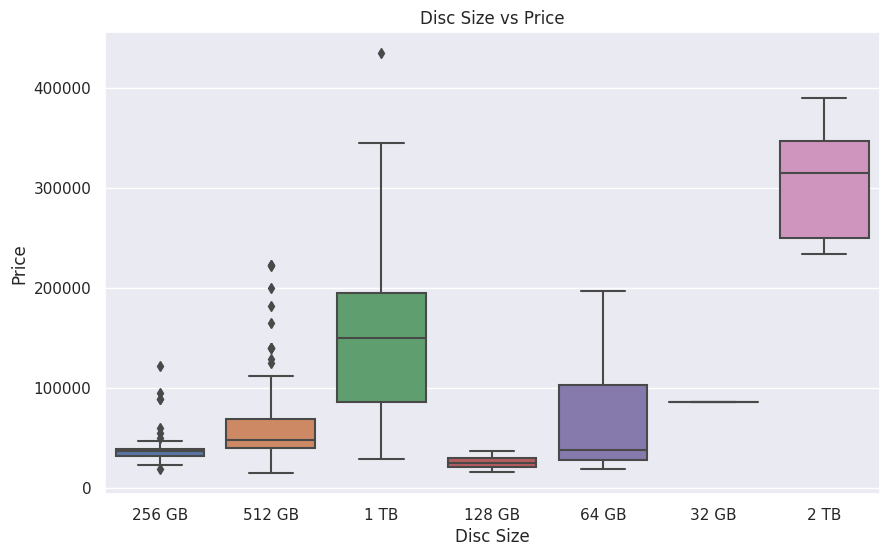

In [ ]:
print(df.groupby(['Disc Size']).agg({'Price' : ['min', 'max', 'mean']}).round())
sns.boxplot(x="Disc Size", y="Price", data=df)
sns.set(rc={"figure.figsize":(14, 6)})
plt.title("Disc Size vs Price")
plt.show()

In [ ]:
data=df[['Brand','Operating System','Processor','RAM Type','RAM Size','Disc Type','Disc Size','Price']]
data.to_csv('laptop_price.csv', index=False)
data.head()

,Brand,Operating System,Processor,RAM Type,RAM Size,Disc Type,Disc Size,Price
0,Lenovo,Windows 11,Intel Core i3,DDR4,8 GB,SSD,256 GB,36990
1,Lenovo,Windows 11,Intel Core i3,DDR4,8 GB,SSD,512 GB,39990
2,ASUS,Windows 11,Intel Core i3,DDR4,8 GB,SSD,512 GB,32990
3,HP,Windows 10,AMD Ryzen 5 Hexa Core,DDR4,8 GB,SSD,512 GB,49990
4,ASUS,MAC,Intel Core i5,DDR4,8 GB,SSD,512 GB,49990


## **OBSERVATIONS**

1. Price for laptop brand ALIENWARE is ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops.
2. Average price for ALIENWARE, APPLE, ASUS,MSI laptops brand is high.
3. Average price is high for MAC Operating System laptops.
4. Apple M1 Max Processor laptops has high average laptop price as compared to any other processor.
5. LPDDR3 RAM type laptops has highest average price.
6. SSD Disc type laptops has highest average price.
7. Higher the RAM size higher the Price of laptop.
8. Higher the Disc size higher the Price of laptop.
9. 64 GB RAM size laptops have high average price.
10. 2 TB Disc size laptops have high average price.